# Attractor Reconstruction - Henon, Lorenz, Rossler
Nonlinear Time Series Analysis - Computer Science Master's Degree Course - Federal University of São Paulo (UNIFESP) - Prof. Elbert E. N. Macau

Author: Rafael Leiniö


## Algorithm Implementations

- [Henon Map](https://github.com/rafaelleinio/ntsa/blob/master/ntsa/algorithms/maps/henon.py)
- [Lorenz Map](https://github.com/rafaelleinio/ntsa/blob/master/ntsa/algorithms/maps/lorenz.py)
- [Rössler Map](https://github.com/rafaelleinio/ntsa/blob/master/ntsa/algorithms/maps/rossler.py)

In [1]:
# fix working dir
import pathlib
import os
path = os.path.join(pathlib.Path().absolute(), '../..')
os.chdir(path)

In [2]:
# imports
import numpy as np
import pylab as pl
from matplotlib import collections  as mc
import matplotlib.pyplot as plt
import itertools

In [3]:
# functions

def generate_orbit_xyz(initial_condition, map_, dt, steps):
    xs = np.empty(steps + 1)
    ys = np.empty(steps + 1)
    zs = np.empty(steps + 1)
    xs[0], ys[0], zs[0] = initial_condition

    for i in range(number_of_points):
        x_dot, y_dot, z_dot = map_.dot_xyz(xs[i], ys[i], zs[i])
        xs[i + 1] = xs[i] + (x_dot * dt)
        ys[i + 1] = ys[i] + (y_dot * dt)
        zs[i + 1] = zs[i] + (z_dot * dt)
    return xs, ys, zs

## Henon

### Original Henon orbit

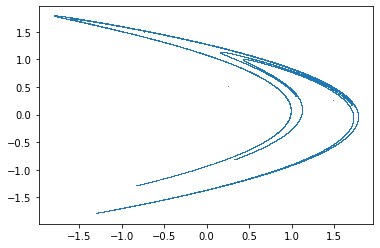

In [4]:
import random
from ntsa.algorithms.maps import Henon

henon_map = Henon(a=1.4, b=0.3)

n = 100000

xs = [0.25]
ys = [0.5]

for i in range(100000):
    new_x, new_y = henon_map.f([xs[i], ys[i]])
    xs.append(new_x)
    ys.append(new_y)

plt.plot(xs, ys, ',')

### Reconstruction with τ = 1

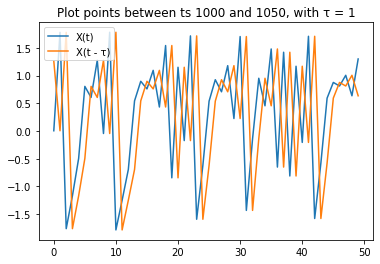

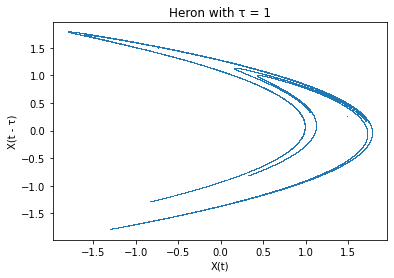

In [5]:
delay = 1

new_xs = xs[delay: n]
new_ys = xs[:n - delay]

# ploting lines delay demonstration

plt.plot(new_xs[1000:1050], label='X(t)')
plt.plot(new_ys[1000:1050], label='X(t - τ)')

plt.title(f"Plot points between ts 1000 and 1050, with τ = {delay}")
plt.legend(loc="upper left")
plt.show()

# ploting orbit
fig = plt.figure()
ax = fig.gca()

# lw=0.5

ax.plot(new_xs, new_ys, ',')
ax.set_xlabel("X(t)")
ax.set_ylabel("X(t - τ)")
ax.set_title(f"Heron with τ = {delay}")

plt.show()

### Reconstruction with τ = 2

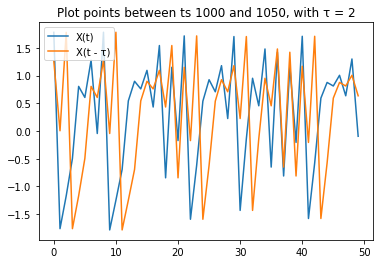

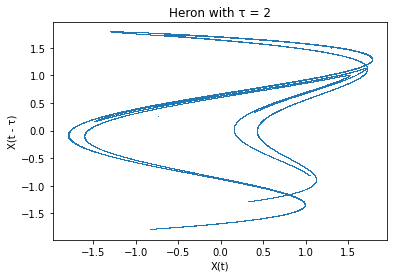

In [6]:
delay = 2

new_xs = xs[delay: n]
new_ys = xs[:n - delay]

# ploting lines delay demonstration

plt.plot(new_xs[1000:1050], label='X(t)')
plt.plot(new_ys[1000:1050], label='X(t - τ)')

plt.title(f"Plot points between ts 1000 and 1050, with τ = {delay}")
plt.legend(loc="upper left")
plt.show()

# ploting orbit
fig = plt.figure()
ax = fig.gca()

# lw=0.5

ax.plot(new_xs, new_ys, ',')
ax.set_xlabel("X(t)")
ax.set_ylabel("X(t - τ)")
ax.set_title(f"Heron with τ = {delay}")

plt.show()

## Lorenz Reconstruction

### Original Lorenz Orbit

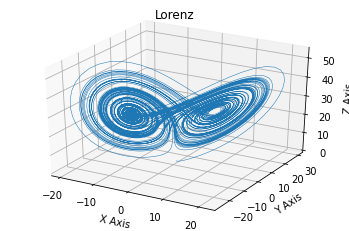

In [7]:
from ntsa.algorithms.maps import Lorenz

lorenz_map = Lorenz(sigma=10, rho=28, beta=8 / 3)

starting_point = [0, 2, 0]

number_of_points = 10000
dt = 0.01

xs, ys, zs = generate_orbit_xyz(
    initial_condition=(0, 2, 0),
    map_=lorenz_map,
    dt=0.01,
    steps=number_of_points
)

# plot
fig = plt.figure()
ax = fig.gca(projection='3d')

ax.plot(xs, ys, zs, lw=0.5)
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.set_zlabel("Z Axis")
ax.set_title("Lorenz")

plt.show()

### Reconstruction with τ = 5

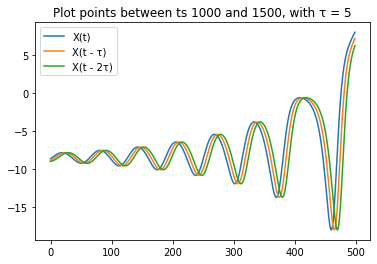

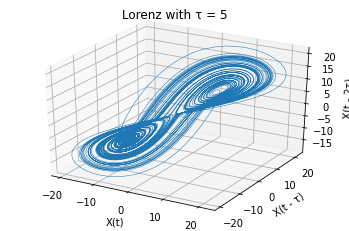

In [8]:
delay = 5

new_xs = xs[delay * 2: number_of_points]
new_ys = xs[delay:number_of_points - delay]
new_zs = xs[:number_of_points - (delay * 2)]

# ploting lines delay demonstration

plt.plot(new_xs[1000:1500], label='X(t)')
plt.plot(new_ys[1000:1500], label='X(t - τ)')
plt.plot(new_zs[1000:1500], label='X(t - 2τ)')
plt.title(f"Plot points between ts 1000 and 1500, with τ = {delay}")
plt.legend(loc="upper left")
plt.show()

# ploting orbit
fig = plt.figure()
ax = fig.gca(projection='3d')

ax.plot(new_xs, new_ys, new_zs, lw=0.5)
ax.set_xlabel("X(t)")
ax.set_ylabel("X(t - τ)")
ax.set_zlabel("X(t - 2τ)")
ax.set_title(f"Lorenz with τ = {delay}")

plt.show()

### Reconstruction with τ = 10

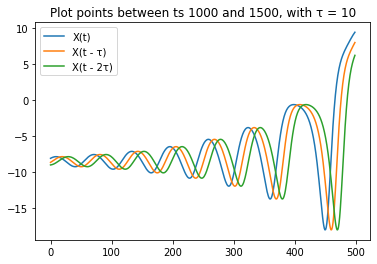

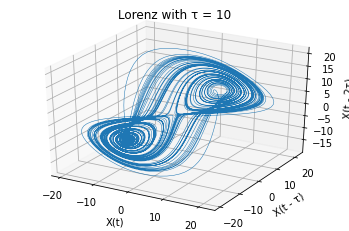

In [9]:
delay = 10

new_xs = xs[delay * 2: number_of_points]
new_ys = xs[delay:number_of_points - delay]
new_zs = xs[:number_of_points - (delay * 2)]

# ploting lines delay demonstration

plt.plot(new_xs[1000:1500], label='X(t)')
plt.plot(new_ys[1000:1500], label='X(t - τ)')
plt.plot(new_zs[1000:1500], label='X(t - 2τ)')
plt.title(f"Plot points between ts 1000 and 1500, with τ = {delay}")
plt.legend(loc="upper left")
plt.show()

# ploting orbit
fig = plt.figure()
ax = fig.gca(projection='3d')

ax.plot(new_xs, new_ys, new_zs, lw=0.5)
ax.set_xlabel("X(t)")
ax.set_ylabel("X(t - τ)")
ax.set_zlabel("X(t - 2τ)")
ax.set_title(f"Lorenz with τ = {delay}")

plt.show()

## Rössler Reconstruction

### Original Rössler Orbit

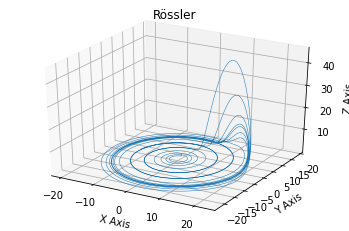

In [10]:
from ntsa.algorithms.maps import Rossler

rossler_map = Rossler(a=0.1, b=0.1, c=14)

starting_point = [0, 2, 1]

number_of_points = 10000
dt = 0.01

xs, ys, zs = generate_orbit_xyz(
    initial_condition=(0, 2, 1),
    map_=rossler_map,
    dt=0.01,
    steps=number_of_points
)

# Plot

fig = plt.figure()
ax = fig.gca(projection='3d')

ax.plot(xs, ys, zs, lw=0.5)
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.set_zlabel("Z Axis")
ax.set_title("Rössler")

plt.show()

### Reconstruction with τ = 10

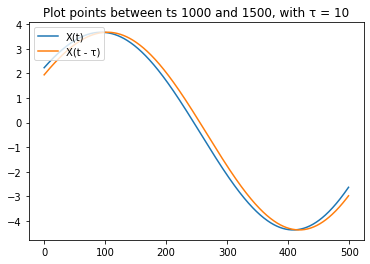

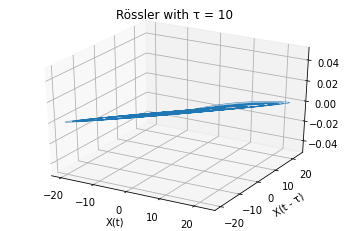

In [11]:
delay = 10

new_xs = xs[delay: number_of_points]
new_ys = xs[:number_of_points - delay]

# ploting lines delay demonstration

plt.plot(new_xs[1000:1500], label='X(t)')
plt.plot(new_ys[1000:1500], label='X(t - τ)')

plt.title(f"Plot points between ts 1000 and 1500, with τ = {delay}")
plt.legend(loc="upper left")
plt.show()

# ploting orbit
fig = plt.figure()
ax = fig.gca(projection='3d')

ax.plot(new_xs, new_ys, lw=0.5)
ax.set_xlabel("X(t)")
ax.set_ylabel("X(t - τ)")
ax.set_title(f"Rössler with τ = {delay}")

plt.show()

### Reconstruction with τ = 100

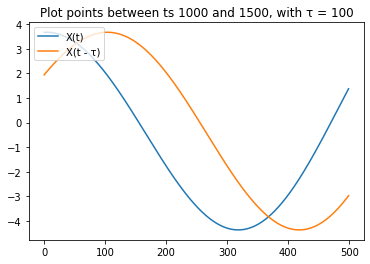

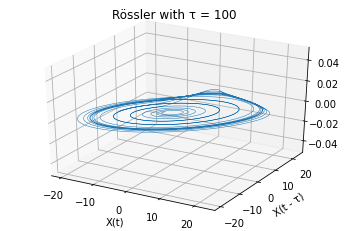

In [18]:
delay = 100

new_xs = xs[delay: number_of_points]
new_ys = xs[:number_of_points - delay]

# ploting lines delay demonstration

plt.plot(new_xs[1000:1500], label='X(t)')
plt.plot(new_ys[1000:1500], label='X(t - τ)')

plt.title(f"Plot points between ts 1000 and 1500, with τ = {delay}")
plt.legend(loc="upper left")
plt.show()

# ploting orbit
fig = plt.figure()
ax = fig.gca(projection='3d')

ax.plot(new_xs, new_ys, lw=0.5)
ax.set_xlabel("X(t)")
ax.set_ylabel("X(t - τ)")
ax.set_title(f"Rössler with τ = {delay}")

plt.show()